In [34]:
# lib downloads
import sys
start_time = time.time()
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install vaex
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pandas
print("--- %s seconds ---" % (time.time() - start_time))

In [1]:
import time
start_time = time.time()

import vaex
import vaex.jupyter
import vaex.jupyter.model as vjm
import numpy as np
import matplotlib.pyplot as plt
import vaex.jupyter


import seaborn as sns

import pandas as pd
print("--- %s seconds ---" % (time.time() - start_time))


--- 3.120004415512085 seconds ---


In [2]:
start_time = time.time()
# Dateipfad: ein ordner namens "assets" der im gleichen ordner wie das ipython Notebook liegt und die datei enthält
pandas_df = pd.read_csv('assets/annotation_example1.txt',sep=";")
print("--- %s seconds ---" % (time.time() - start_time))

pandas_df['valueLog'] = pandas_df.apply(lambda row: np.log10(row.value+0.01), axis=1)
print("--- %s seconds ---" % (time.time() - start_time))
pandas_df['backvalueLog'] = pandas_df.apply(lambda row: np.log10(row.back_value+0.01), axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

df = vaex.from_pandas(df=pandas_df)
print("--- %s seconds ---" % (time.time() - start_time))

display(df)
print("--- %s seconds ---" % (time.time() - start_time))


--- 4.641006231307983 seconds ---
--- 57.87439584732056 seconds ---
--- 115.55251932144165 seconds ---
--- 118.1975257396698 seconds ---


#,pos_id,barcode,run_id,test_date,sign,value,back_value,valueLog,backvalueLog
0,1D99900010425,1D9990001AA,1,2011-08-02 10:08,n,102.48,99.97,2.0106814931314436,1.9999131324165715
1,1D99900010426,1D9990001AA,1,2011-08-02 10:08,n,89.8,106.2,1.9533246963891853,2.0261654088392524
2,1D99900010427,1D9990001AA,1,2011-08-02 10:08,n,91.11,104.31,1.9596137110710439,2.018367578387845
3,1D99900010428,1D9990001AA,1,2011-08-02 10:08,n,86.9,107.12,1.9390697499234244,2.0299111049124443
4,1D99900010429,1D9990001AA,1,2011-08-02 10:08,n,88.18,100.59,1.9454193426030633,2.0025979807199086
...,...,...,...,...,...,...,...,...,...
"3,985,915",1DUMY04150201,1DUMY0415AE,11,2012-10-27 10:10,n,90.98,104.34,1.958993665030326,2.018492453401473
"3,985,916",1DUMY04150202,1DUMY0415AE,11,2012-10-27 10:10,n,103.84,110.09,2.016406500871118,2.041787318971752
"3,985,917",1DUMY04150203,1DUMY0415AE,11,2012-10-27 10:10,n,109.63,100.68,2.039969026867461,2.002986340856785
"3,985,918",1DUMY04150204,1DUMY0415AE,11,2012-10-27 10:10,n,100.13,101.13,2.0006075870628903,2.004922949296526


--- 118.22752547264099 seconds ---


In [3]:
start_time = time.time()
# in manchen datensätzen heißt die spalte backvalue, in manchen back_value, hier anpassen
df = df['value', 'back_value', 'sign','valueLog','backvalueLog']
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.0 seconds ---


In [7]:
#start_time = time.time()
#df = vaex.from_csv('assets/annotation_example1.txt',sep=";")

#df = df['value', 'back_value', 'sign']
#print(len(df))
#length = len(df)
#display(df)
#print("--- %s seconds ---" % (time.time() - start_time))


3985920


#,value,back_value,sign
0,102.48,99.97,n
1,89.8,106.2,n
2,91.11,104.31,n
3,86.9,107.12,n
4,88.18,100.59,n
...,...,...,...
"3,985,915",90.98,104.34,n
"3,985,916",103.84,110.09,n
"3,985,917",109.63,100.68,n
"3,985,918",100.13,101.13,n


--- 7.43042516708374 seconds ---


In [64]:
#start_time = time.time()
#df = vaex.from_csv('assets/annotation_example4.csv')
#
#df = df['value', 'backvalue', 'sign']
#print(len(df))
#length = len(df)
#display(df)
#print("--- %s seconds ---" % (time.time() - start_time))


5314518


#,value,backvalue,sign
0,88.33,131.05,s
1,98.66,95.69,s
2,35.03,70.9,s
3,99.09,79.79,s
4,82.09,143.5,s
...,...,...,...
"5,314,513",91.29,62.59,s
"5,314,514",98.03,87.89,s
"5,314,515",83.06,167.81,s
"5,314,516",91.04,104.61,s


--- 10.09101414680481 seconds ---


In [4]:
start_time = time.time()
@vaex.register_function()
def signToNumber(s):
    return ['n','z','p','s','f'].index(s)

df['signNumber'] = df.apply(signToNumber, arguments=[df.sign])
df = df[df.signNumber !=  4]
display(df)

print("--- %s seconds ---" % (time.time() - start_time))

#,value,back_value,sign,valueLog,backvalueLog,signNumber
0,102.48,99.97,n,2.0106814931314436,1.9999131324165715,0
1,89.8,106.2,n,1.9533246963891853,2.0261654088392524,0
2,91.11,104.31,n,1.9596137110710439,2.018367578387845,0
3,86.9,107.12,n,1.9390697499234244,2.0299111049124443,0
4,88.18,100.59,n,1.9454193426030633,2.0025979807199086,0
...,...,...,...,...,...,...
"3,985,277",90.98,104.34,n,1.958993665030326,2.018492453401473,0
"3,985,278",103.84,110.09,n,2.016406500871118,2.041787318971752,0
"3,985,279",109.63,100.68,n,2.039969026867461,2.002986340856785,0
"3,985,280",100.13,101.13,n,2.0006075870628903,2.004922949296526,0


--- 6.459022283554077 seconds ---


In [5]:
#start_time = time.time()
#@vaex.register_function()
#def log(v):
#    if v < 0.1:
#        return np.log(0.1)
#    return np.log(v)

#df['valueLog'] = df.apply(log, arguments=[df.value])
#df['backvalueLog'] = df.apply(log, arguments=[df.back_value])
#df.execute()
#display(df)

#print("--- %s seconds ---" % (time.time() - start_time))

#,value,back_value,sign,signNumber,valueLog,backvalueLog
0,65.05,50.57,s,3,4.1751562049585145,3.9233585150918917
1,80.39,120.1,s,3,4.386889790339869,4.788324729085938
2,98.83,97.27,s,3,4.593401202388092,4.577490616881349
3,119.92,124.45,s,3,4.786824853794342,4.823904028813601
4,94.73,81.88,s,3,4.551030739887443,4.405254760793088
...,...,...,...,...,...,...
"4,036,691",108.0,86.16,s,3,4.68213122712422,4.456206032848133
"4,036,692",99.36,80.8,s,3,4.598749618185169,4.39197696552705
"4,036,693",78.83,58.85,s,3,4.367293635071817,4.074991833706286
"4,036,694",122.61,104.87,s,3,4.809008586244295,4.652721487846314


--- 0.09100508689880371 seconds ---


In [5]:
start_time = time.time()

# count signs:
display(df.groupby(by='signNumber').agg({'signNumber': 'count'}))
print("--- %s seconds ---" % (time.time() - start_time))

#,signNumber,count
0,3,3.19848e+06
1,0,778292
2,2,6144
3,1,2368


--- 12.705034732818604 seconds ---


In [34]:
#start_time = time.time()

#def valuesWithinMeanPM3Std(d)-> vaex.dataframe.DataFrameArrays:
#    start_time = time.time()

#    stdValue = d.std('value')
 #   stdBackvalue = d.std('backvalue')
  #  meanValue = d.mean('value')
   # meanBackvalue = d.mean('backvalue')
    #meanPlusMinus3StdValue = (meanValue-3*stdValue, meanValue +3*stdValue)
    #meanPlusMinus3StdBackvalue = (meanBackvalue -3*stdBackvalue, meanBackvalue +3*stdBackvalue)
    #CleansedWith3Std = d[(d['value'] <= meanPlusMinus3StdValue[1] )& (d['value'] >= meanPlusMinus3StdValue[0])& (d['backvalue'] <= meanPlusMinus3StdBackvalue[1]) & (d['backvalue'] >= meanPlusMinus3StdBackvalue[0])]
    #print(len(d))
    #print(len(CleansedWith3Std))
    #print("reduced to " +str(100*len(CleansedWith3Std)/len(d)) +"%")
    #print("--- %s seconds ---" % (time.time() - start_time))
    #return CleansedWith3Std
#print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


In [6]:
start_time = time.time()


dfn = df[df.signNumber == 0]
#dfn = valuesWithinMeanPM3Std(dfn)

dfz = df[df.signNumber == 1]
#dfz = valuesWithinMeanPM3Std(dfz)

dfp = df[df.signNumber == 2]
#dfp = valuesWithinMeanPM3Std(dfp)
#dfp = dfp[dfp.backvalue < 800]
#print("further reduced to length: " +str(len(dfp)))

dfs = df[df.signNumber == 3]
#dfs = valuesWithinMeanPM3Std(dfs)

#df = dfn.concat(dfz)
#df = df.concat(dfp)
#df = df.concat(dfs)
#df = vaex.concat([dfn,dfz,dfp,dfs])
print(type(df))
#print(type(df))

print("--- %s seconds ---" % (time.time() - start_time))

<class 'vaex.dataframe.DataFrameArrays'>
--- 0.010000228881835938 seconds ---


In [7]:
start_time = time.time()
# in manchen datensätzen heißt die spalte backvalue, in manchen back_value, hier anpassen
v = 'value'
b = 'back_value'
df = df[((((df['signNumber'] == 0) 
          & (df[v] < dfn.mean(v)+3*dfn.std(v)) 
          & (df[v] > dfn.mean(v)-3*dfn.std(v))) 
         & ((df[b] < dfn.mean(b)+3*dfn.std(b)) 
            & (df[b] > dfn.mean(b)-3*dfn.std(b)))) 
        | (((df['signNumber'] == 1) 
            & (df[v] < dfz.mean(v)+3*dfz.std(v)) 
            & (df[v] > dfz.mean(v)-3*dfz.std(v))) 
           & ((df[b] < dfz.mean(b)+3*dfz.std(b)) 
              & (df[b] > dfz.mean(b)-3*dfz.std(b))))
        | (((df['signNumber'] == 2) 
            & (df[v] < dfp.mean(v)+3*dfp.std(v)) 
            & (df[v] > dfp.mean(v)-3*dfp.std(v)))
           & ((df[b] < dfp.mean(b)+3*dfp.std(b)) 
              & (df[b] > dfp.mean(b)-3*dfp.std(b)) 
              & (df[b] < 800)))
        | (((df['signNumber'] == 3) 
            & (df[v] < dfs.mean(v)+3*dfs.std(v)) 
            & (df[v] > dfs.mean(v)-3*dfs.std(v)))
           & ((df[b] < dfs.mean(b)+3*dfs.std(b)) 
              & (df[b] > dfs.mean(b)-3*dfs.std(b)))))]
print(type(df))
display(df)
print("--- %s seconds ---" % (time.time() - start_time))

<class 'vaex.dataframe.DataFrameArrays'>


#,value,back_value,sign,valueLog,backvalueLog,signNumber
0,102.48,99.97,n,2.0106814931314436,1.9999131324165715,0
1,89.8,106.2,n,1.9533246963891853,2.0261654088392524,0
2,91.11,104.31,n,1.9596137110710439,2.018367578387845,0
3,86.9,107.12,n,1.9390697499234244,2.0299111049124443,0
4,88.18,100.59,n,1.9454193426030633,2.0025979807199086,0
...,...,...,...,...,...,...
"3,899,884",90.98,104.34,n,1.958993665030326,2.018492453401473,0
"3,899,885",103.84,110.09,n,2.016406500871118,2.041787318971752,0
"3,899,886",109.63,100.68,n,2.039969026867461,2.002986340856785,0
"3,899,887",100.13,101.13,n,2.0006075870628903,2.004922949296526,0


--- 51.843101024627686 seconds ---


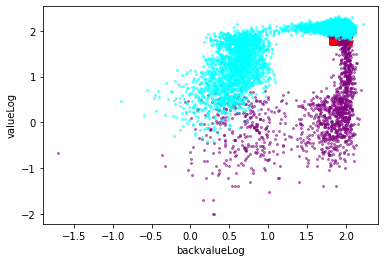

--- 3.936225175857544 seconds ---


In [16]:
start_time = time.time()
# substanzen
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False)
# neutral 
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False)
# negativ
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False)
#positiv
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.1481800079345703 seconds ---


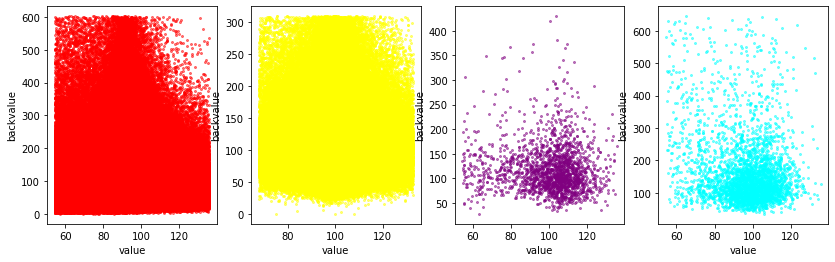

In [27]:
start_time = time.time()
# in manchen datensätzen heißt die spalte backvalue, in manchen back_value, hier anpassen

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,4))
plt.sca(ax1)
df3.scatter(df.value, df.backvalue,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False)
plt.sca(ax2)
df3.scatter(df.value, df.backvalue,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False)
plt.sca(ax3)
df3.scatter(df.value, df.backvalue,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False)
plt.sca(ax4)
df3.scatter(df.value, df.backvalue,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
#df =df3.to_pandas_df(["value", "backvalue","signNumber"])

In [ ]:
#start_time = time.time()
#sns.jointplot(
#    data=df, x="value", y="backvalue",
#    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),hue="signNumber"
#)
#print("--- %s seconds ---" % (time.time() - start_time))

In [21]:
selection_widget = df.widget.selection_expression('default')
await vaex.jupyter.gather()

display(df[df['sign'] == 'n'].widget.heatmap('backvalueLog', 'valueLog', selection=[None, True,selection_widget], selection_interact='default', colorbar= True))
await vaex.jupyter.gather()

display(df[df['sign'] == 's'].widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()

display(selection_widget)

await vaex.jupyter.gather()


Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

ExpressionSelectionTextArea(error_messages="Column or variable 'default' does not exist.", label='Filter by cu…

In [22]:
display(df[df['sign'] == 'z'].widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()

display(df[df['sign'] == 'p'].widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()

display(selection_widget)


Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

ExpressionSelectionTextArea(error_messages="Column or variable 'default' does not exist.", label='Filter by cu…

In [23]:

histogram = df.widget.histogram(df.signNumber,  selection=[None, True, selection_widget], selection_interact='default',limits=[-1, 4])
histogram.tool = 'select-x'
await vaex.jupyter.gather()

display(histogram)


Histogram(children=[ToolsToolbar(interact_items=[{'value': 'pan-zoom', 'icon': 'pan_tool', 'tooltip': 'Pan & z…

In [ ]:
start_time = time.time()
# benutzeranleitung: diese Zeile und die darunterliegende ausführen, 
# dann irgendwas in dem darunterliegenden histogramm markieren, damit die verknüpfung zwischen den plots hergestellt wird
# dann die zeile unter dem histogramm ausführen, um die säulendiagramme zu erhalten 
# (diese müssen bei jeder markierung neu manuell ausgeführt werden, zur zeit unklar, ob automatisch möglich)
# falls statt der grafischen Oberfläche das selection widget (die zeile unter dem plot) benutzt werden möchte kann bsp über folgenden Syntax eine Auswahl getroffen werden:
# (signNumber == 1) & (valueLog > 1.5) & (backvalueLog > 1)
selection_widget = df.widget.selection_expression('default')

display(df.widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
display(selection_widget)
print("--- %s seconds ---" % (time.time() - start_time))

In [19]:
await vaex.jupyter.gather()
histogram = df.widget.histogram(df.signNumber,  selection=[None, True, selection_widget], selection_interact='default',limits=[-1, 4])
histogram.tool = 'select-x'
histogram

Histogram(children=[ToolsToolbar(interact_items=[{'value': 'pan-zoom', 'icon': 'pan_tool', 'tooltip': 'Pan & z…

[[      0       0       0       0       0       0       0       0       0
        0       0       0  766475       0       0       0       0       0
        0       0       0       0       0       0       0    2368       0
        0       0       0       0       0       0       0       0       0
        0       0    6144       0       0       0       0       0       0
        0       0       0       0       0       0 3124902       0       0
        0       0       0       0       0       0       0       0       0
        0]
 [      0       0       0       0       0       0       0       0       0
        0       0       0  766475       0       0       0       0       0
        0       0       0       0       0       0       0    2368       0
        0       0       0       0       0       0       0       0       0
        0       0       0       0       0       0       0       0       0
        0       0       0       0       0       0       0       0       0
        0       0       0  

C:\Users\Buffel\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


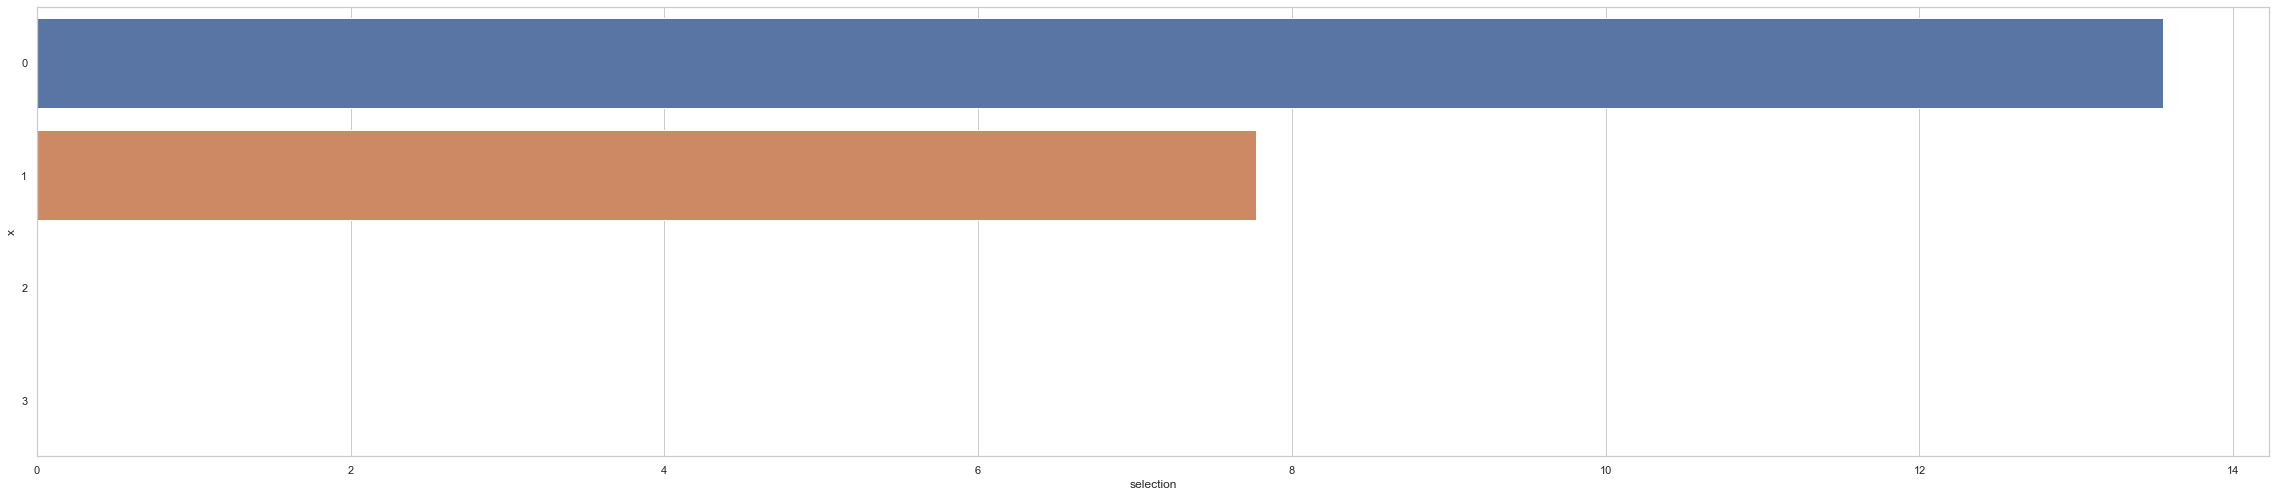

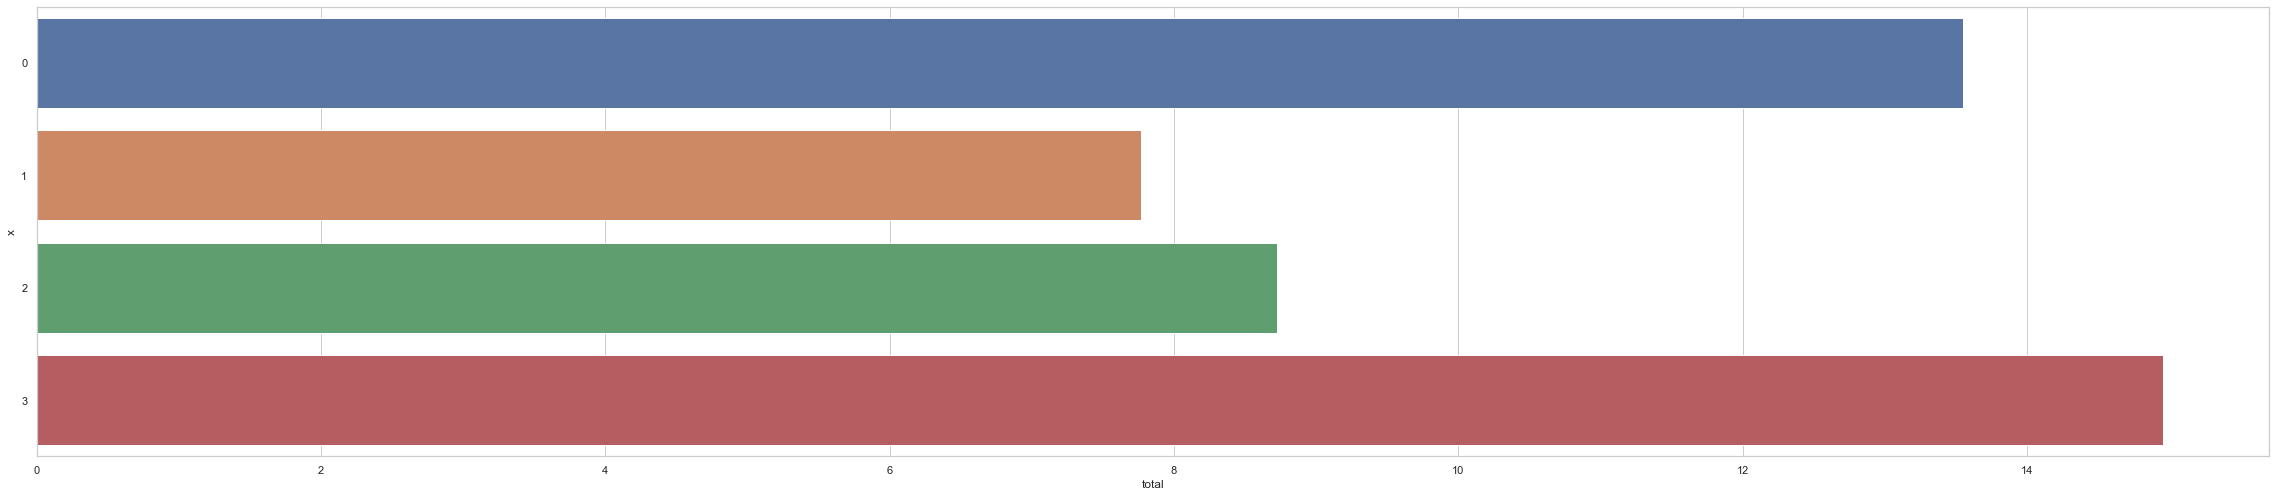

In [33]:
# muss bei jeder selektion manuell neu ausgeführt werden
chart_data = histogram.children[2].marks[0].y
print(chart_data)
indexes = [np.where(chart_data[0] == y)[0][0] for y in chart_data[0] if y != 0]
y1 = [np.log(chart_data[0][i]) for i in indexes]
y2 = [(np.log(chart_data[1][i]),0)[int(chart_data[1][i] < 0.1)] for i in indexes]
print(y1)
print(y2)
d = {'x': [str(x) for x in range(len(y1))], 'total': y1, 'selection': y2}

dfbar = pd.DataFrame(data=d)
#print(y1)
#print(y2)
print(dfbar)

sns.set_theme(style="whitegrid")
a4_dims = (40, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x="selection", y="x", data=dfbar)
plt.show()

fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x="total", y="x", data=dfbar)